In [1]:
import numpy as np
np.random.seed(42)

In [2]:
n = 10
Q = 20
N = [i for i in range(1, n+1)]
V = [0] + N
q = {i: np.random.randint(1, 10) for i in N}

In [18]:
loc_x = np.random.rand(len(V)) * 200
loc_y = np.random.rand(len(V)) * 200
# Fix the depot at location (100, 100)
loc_x[0] = 100
loc_y[0] = 100

In [19]:
import matplotlib.pyplot as plt

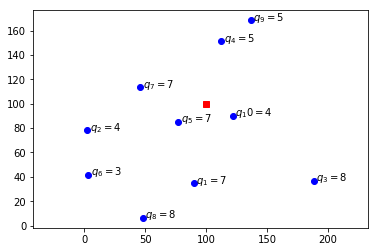

In [20]:
plt.scatter(loc_x[1:], loc_y[1:], c='b')
for i in N:
    plt.annotate('$q_%d=%d$' % (i, q[i]), (loc_x[i]+2, loc_y[i]))
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.axis('equal');

In [6]:
# Edges
A = [(i, j) for i in V for j in V if i != j]
# Cost (Euclidean distance)
c = {(i, j): np.hypot(loc_x[i] - loc_x[j], loc_y[i] - loc_y[j]) for i, j in A}

In [7]:
from docplex.mp.model import Model

In [8]:
model = Model('CVRP')

In [9]:
# Define variables
x = model.binary_var_dict(A, name = 'x')
u = model.continuous_var_dict(N, ub = Q, name = 'u') # lb = 0 by default

In [10]:
# Objective function
model.minimize(model.sum(c[i, j] * x[i, j] for i, j in A))

In [11]:
# Constraints
model.add_constraints(model.sum(x[i, j] for j in V if j != i) == 1 for i in N)
model.add_constraints(model.sum(x[i, j] for i in V if i != j) == 1 for j in N)
model.add_indicator_constraints(model.indicator_constraint(x[i, j], u[i] + q[j] == u[j]) for i, j in A if i != 0 and j != 0)
model.add_constraints(u[i] >= q[i] for i in N)

# Add a time limit on the solver
model.parameters.timelimit = 20

In [12]:
solution = model.solve(log_output=True)

CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               20
Found incumbent of value 2222.196620 after 0.00 sec. (0.01 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 10 rows and 0 columns.
MIP Presolve modified 45 coefficients.
Aggregator did 45 substitutions.
Reduced MIP has 65 rows, 165 columns, and 335 nonzeros.
Reduced MIP has 110 binaries, 0 generals, 0 SOSs, and 90 indicators.
Presolve time = 0.01 sec. (0.35 ticks)
Probing time = 0.00 sec. (0.32 ticks)
Tried aggregator 1 time.
Reduced MIP has 65 rows, 165 columns, and 335 nonzeros.
Reduced MIP has 110 binaries, 0 generals, 0 SOSs, and 90 indicators.
Presolve time = 0.00 sec. (0.23 ticks)
Probing time = 0.00 sec. (0.31 ticks)
Clique table members: 65.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.00 sec. (0.12 ticks)

        Nodes                        

In [13]:
print(solution)

solution for: CVRP
objective: 1091.07
x_0_1=1
x_0_6=1
x_0_10=1
x_1_4=1
x_2_0=1
x_3_8=1
x_4_7=1
x_5_2=1
x_6_3=1
x_7_0=1
x_8_0=1
x_9_5=1
x_10_9=1
u_1=7.000
u_2=20.000
u_3=11.000
u_4=12.000
u_5=16.000
u_6=3.000
u_7=19.000
u_8=19.000
u_9=9.000
u_10=4.000



In [14]:
solution.solve_status

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [15]:
active_edges = [a for a in A if x[a].solution_value > 0.9]

In [16]:
active_edges

[(0, 1),
 (0, 6),
 (0, 10),
 (1, 4),
 (2, 0),
 (3, 8),
 (4, 7),
 (5, 2),
 (6, 3),
 (7, 0),
 (8, 0),
 (9, 5),
 (10, 9)]

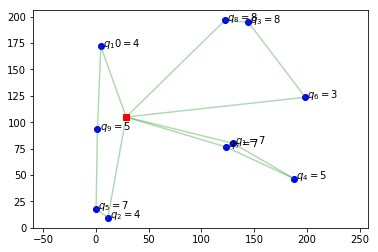

In [17]:
plt.scatter(loc_x[1:], loc_y[1:], c='b')
for i in N:
    plt.annotate('$q_%d=%d$' % (i, q[i]), (loc_x[i]+2, loc_y[i]))
for i, j in active_edges:
    plt.plot([loc_x[i], loc_x[j]], [loc_y[i], loc_y[j]], c='g', alpha=0.3)
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.axis('equal');